In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic

In [2]:
path="/Users/lianysfeliciano/Nikhef_REU/GFH_Sims"

files=glob.glob(path+'/*.csv') 

ls=[]

for f in files: #loop to open each df
    temp_df=pd.read_csv(f) 
    ls.append(temp_df) #adding files to list 
    
#merging all df into one big one
df=pd.concat(ls,axis=0) 
print("Shape:",df.shape)
df.head()

Shape: (1500, 31)


,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,4,2,64,9853,8.768500,1.15,4,7,1.000000e-24,3.520856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,64,9853,2.023500,1.15,4,7,1.000000e-24,5.690079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,64,9853,2.698000,1.15,4,7,1.000000e-24,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3,64,9853,2.023500,1.15,4,7,1.000000e-24,6.011481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,64,9853,1.180375,1.15,4,7,1.000000e-24,4.400973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Num=[1,2,3,4,5,6,7,8,9,10]
N=np.array(df["N"])
for n in Num:
    ls1=[]
    ls2=[]
    ls3=[]
    ls4=[]
    ls5=[]
    ls6=[]
    ls7=[]
    ls8=[]
    ls9=[]
    ls10=[]
    for i in range(len(N)):
        if N[i]==1:
            ls1.append(df.iloc[i])
        elif N[i]==2:
            ls2.append(df.iloc[i])
        elif N[i]==3:
            ls3.append(df.iloc[i])
        elif N[i]==4:
            ls4.append(df.iloc[i])
        elif N[i]==5:
            ls5.append(df.iloc[i])
        elif N[i]==6:
            ls6.append(df.iloc[i])
        elif N[i]==7:
            ls7.append(df.iloc[i])
        elif N[i]==8:
            ls8.append(df.iloc[i])
        elif N[i]==9:
            ls9.append(df.iloc[i])
        elif N[i]==10:
            ls10.append(df.iloc[i])
    
    df1=pd.DataFrame(ls1)
    df2=pd.DataFrame(ls2)
    df3=pd.DataFrame(ls3)
    df4=pd.DataFrame(ls4)
    df5=pd.DataFrame(ls5)
    df6=pd.DataFrame(ls6)
    df7=pd.DataFrame(ls7)
    df8=pd.DataFrame(ls8)
    df9=pd.DataFrame(ls9)
    df10=pd.DataFrame(ls10)    

In [4]:
a=np.array(df1.distaway_1.notnull())

for i in range (len(a)):
    if a[i]==False:
        

IndentationError: expected an indented block (336071156.py, line 5)

In [ ]:
#histogram of distances for 2 signal injection
dist1=df2['distaway_1'] 
dist2=df2['distaway_2']


plt.figure(facecolor='w',figsize=(8,6))
sns.histplot(dist1,alpha=.3,label='dist1',color='blue')
sns.histplot(dist2,alpha=.3,label='dist2',color='purple')
plt.xlabel("Distaway")
plt.legend()


##histogram of distances for 3 signal injection
dist1=df3['distaway_1'] 
dist2=df3['distaway_2']
dist3=df3['distaway_3']


plt.figure(facecolor='w',figsize=(8,6))
sns.histplot(dist1,alpha=.3,label='dist1',color='red')
sns.histplot(dist2,alpha=.3,label='dist2',color='cyan')
sns.histplot(dist3,alpha=.3,label='dist3',color='purple')
plt.xlabel("Distaway")
plt.legend()


 ##histogram of distances for 4 signal injection
dist1=df4['distaway_1'] 
dist2=df4['distaway_2']
dist3=df4['distaway_3']
dist4=df4['distaway_4']

plt.figure(facecolor='w',figsize=(8,6))
sns.histplot(dist1,alpha=.3,label='dist1',color='red')
sns.histplot(dist2,alpha=.3,label='dist2',color='cyan')
sns.histplot(dist3,alpha=.3,label='dist3',color='purple')
sns.histplot(dist4,alpha=.3,label='dist4',color='orange')
plt.xlabel("Distaway")
plt.legend()

In [5]:
def Efficiency(df):
    N =np.array(df.N)
    Retireved_N=np.array(df.Retireved_N	)
    h0=np.array(df.h0)
    a=0
    b=0
    c=0
    
    for i in range(len(N)):
        if Retireved_N[i]!=0 and h0[i]==1.0e-22:
            a= a+Retireved_N[i]
            
        if Retireved_N[i]!=0 and h0[i]==1.0000000000000001e-23:
            b=b+Retireved_N[i]
            
        if Retireved_N[i]!=0 and h0[i]==1.0000000000000001e-24:
            c=c+Retireved_N[i]
    
    
    E1=a/(N[1]*50)#it is done like this becasue each amp ran 50 sims out of the 150 in df
    E2=b/(N[1]*50)
    E3=c/(N[1]*50)

    return E1,E2,E3

In [6]:
DF=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
E1=[]
E2=[]
E3=[]
for i in DF:
    e1,e2,e3=Efficiency(i)
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


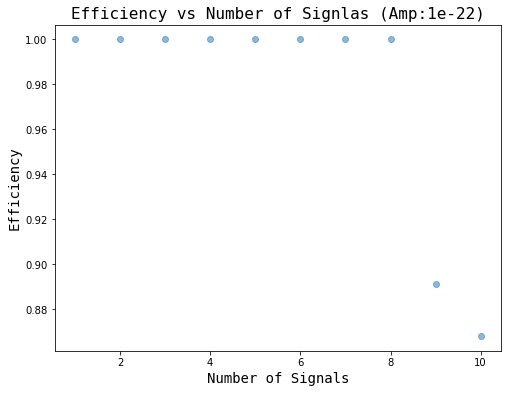

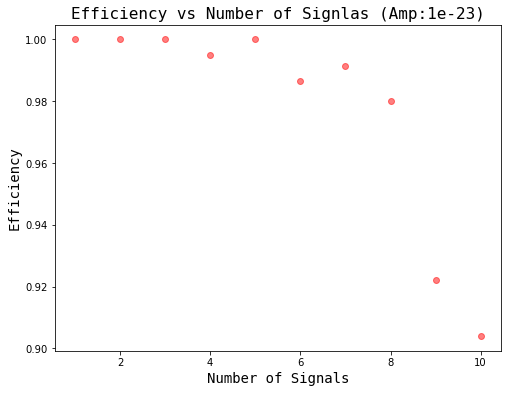

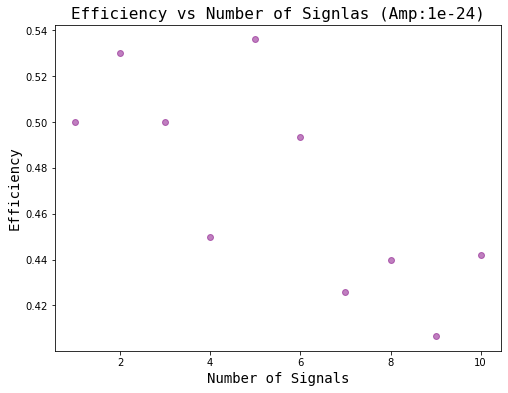

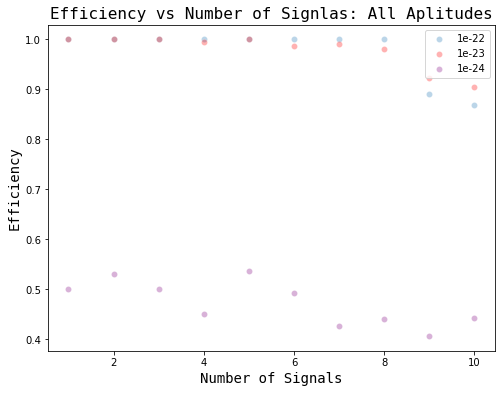

In [7]:
N=np.arange(1,11)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E1,alpha=.5)
plt.title('Efficiency vs Number of Signlas (Amp:1e-22)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="r")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="purple")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.3,label='1e-22')
sns.scatterplot(N,E2,alpha=.3,color="r",label='1e-23')
sns.scatterplot(N,E3,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend()

### Distance analysis (changing the cutoffs)
Im going to analyse three differnt cutoffs, if its less than 6, 5,and 4 and see how the effiencey changes as a result. 


In [8]:
dist_df=df.filter(like='distaway') #pulling out onnly distannce columns
dist_df["N"]=df.N #adding nnumber of injected signals col 
dist_df['h0']=df.h0
dist_df

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_53647/311063487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_df["N"]=df.N #adding nnumber of injected signals col
/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_53647/311063487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_df['h0']=df.h0


,distaway_1,distaway_2,distaway_3,distaway_4,distaway_5,distaway,distaway_6,distaway_7,distaway_8,distaway_9,distaway_10,N,h0
0,3.520856,2.655650,1.790332,4.656354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24
1,5.690079,6.232963,2.401724,5.631619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24
2,0.648514,4.252922,0.625717,5.430915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24
3,6.011481,1.172737,2.834262,2.950042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24
4,4.400973,4.916412,0.902645,3.281245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22
46,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22
47,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,1.378489,1.630918,NaN,NaN,NaN,7,1.000000e-22
48,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22


In [9]:
#connverting each col into an array
distaway=np.array(dist_df.distaway)
distaway_1=np.array(dist_df.distaway_1)
distaway_2=np.array(dist_df.distaway_2)
distaway_3=np.array(dist_df.distaway_3)
distaway_4=np.array(dist_df.distaway_4)
distaway_5=np.array(dist_df.distaway_5)
distaway_6=np.array(dist_df.distaway_6)
distaway_7=np.array(dist_df.distaway_7)
distaway_8=np.array(dist_df.distaway_8)
distaway_9=np.array(dist_df.distaway_9)
distaway_10=np.array(dist_df.distaway_10)

In [34]:
#lets make a loop that takes a columdn and redetermins the found giving differnt parameters
N=dist_df['N']
found=np.zeros(len(N))

for i in range (len(N)):
    temp=[]
    if distaway[i]<=4:
        temp.append(1)
    if distaway_1[i]<=4:
        temp.append(1)
    if distaway_2[i]<=4:
        temp.append(1)
    if distaway_3[i]<=4:
        temp.append(1)
    if distaway_4[i]<=4:
        temp.append(1)
    if distaway_5[i]>=4:
        temp.append(1)
    if distaway_6[i]<=4:
        temp.append(1)
    if distaway_7[i]<=4:
        temp.append(1)
    if distaway_8[i]<=4:
        temp.append(1)
    if distaway_9[i]<=4:
        temp.append(1)
    if distaway_10[i]<=4:
        temp.append(1)
    
    print(temp)
    found[i]=sum(temp)

[1, 1, 1]
[1]
[1, 1]
[1, 1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1]
[1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1]
[1, 1]
[1, 1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1]
[1, 1]
[1, 1, 1]
[1, 1]
[1, 1, 1]
[1, 1]
[1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1]
[1, 1]
[1, 1]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1]
[1, 1, 1]
[1, 1]
[1, 1]
[1, 1, 1]
[1]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1

[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]


In [35]:
found

array([3., 1., 2., ..., 6., 6., 6.])

In [36]:
dist_df['Found_Sig_Dist4']=found
dist_df

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_53647/3414894390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_df['Found_Sig_Dist4']=found


,distaway_1,distaway_2,distaway_3,distaway_4,distaway_5,distaway,distaway_6,distaway_7,distaway_8,distaway_9,distaway_10,N,h0,Found_Sig_Dist4,Found_Sig_Dist5,Found_Sig_Dist6
0,3.520856,2.655650,1.790332,4.656354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,3.0,4.0,4.0
1,5.690079,6.232963,2.401724,5.631619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,1.0,1.0,3.0
2,0.648514,4.252922,0.625717,5.430915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,2.0,3.0,4.0
3,6.011481,1.172737,2.834262,2.950042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,3.0,3.0,3.0
4,4.400973,4.916412,0.902645,3.281245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
46,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
47,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,1.378489,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
48,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0


In [37]:
#Now lets do it for a distaicen Less than 5 
N=dist_df['N']
found2=np.zeros(len(N))

for i in range (len(N)):
    temp2=[]
    if distaway[i]<=5:
        temp2.append(1)
    if distaway_1[i]<=5:
        temp2.append(1)
    if distaway_2[i]<=5:
        temp2.append(1)
    if distaway_3[i]<=5:
        temp2.append(1)
    if distaway_4[i]<=5:
        temp2.append(1)
    if distaway_5[i]>=5:
        temp2.append(1)
    if distaway_6[i]<=5:
        temp2.append(1)
    if distaway_7[i]<=5:
        temp2.append(1)
    if distaway_8[i]<=5:
        temp2.append(1)
    if distaway_9[i]<=5:
        temp2.append(1)
    if distaway_10[i]<=5:
        temp2.append(1)
    found2[i]=sum(temp2)
print(found2)

[4. 1. 3. ... 6. 6. 6.]


In [38]:
dist_df['Found_Sig_Dist5']=found2
dist_df

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_53647/1232555347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_df['Found_Sig_Dist5']=found2


,distaway_1,distaway_2,distaway_3,distaway_4,distaway_5,distaway,distaway_6,distaway_7,distaway_8,distaway_9,distaway_10,N,h0,Found_Sig_Dist4,Found_Sig_Dist5,Found_Sig_Dist6
0,3.520856,2.655650,1.790332,4.656354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,3.0,4.0,4.0
1,5.690079,6.232963,2.401724,5.631619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,1.0,1.0,3.0
2,0.648514,4.252922,0.625717,5.430915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,2.0,3.0,4.0
3,6.011481,1.172737,2.834262,2.950042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,3.0,3.0,3.0
4,4.400973,4.916412,0.902645,3.281245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
46,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
47,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,1.378489,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
48,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0


In [39]:
#lastly we'll try to see for a distance of 6 
N=dist_df['N']
found3=np.zeros(len(N))

for i in range (len(N)):
    temp3=[]
    if distaway[i]<=6:
        temp3.append(1)
    if distaway_1[i]<=6:
        temp3.append(1)
    if distaway_2[i]<=6:
        temp3.append(1)
    if distaway_3[i]<=6:
        temp3.append(1)
    if distaway_4[i]<=6:
        temp3.append(1)
    if distaway_5[i]>=6:
        temp3.append(1)
    if distaway_6[i]<=6:
        temp3.append(1)
    if distaway_7[i]<=6:
        temp3.append(1)
    if distaway_8[i]<=6:
        temp3.append(1)
    if distaway_9[i]<=6:
        temp3.append(1)
    if distaway_10[i]<=6:
        temp3.append(1)
    found3[i]=sum(temp3)
print(found3)

[4. 3. 4. ... 6. 6. 6.]


In [40]:
dist_df['Found_Sig_Dist6']=found3
dist_df

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_53647/3341952328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_df['Found_Sig_Dist6']=found3


,distaway_1,distaway_2,distaway_3,distaway_4,distaway_5,distaway,distaway_6,distaway_7,distaway_8,distaway_9,distaway_10,N,h0,Found_Sig_Dist4,Found_Sig_Dist5,Found_Sig_Dist6
0,3.520856,2.655650,1.790332,4.656354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,3.0,4.0,4.0
1,5.690079,6.232963,2.401724,5.631619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,1.0,1.0,3.0
2,0.648514,4.252922,0.625717,5.430915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,2.0,3.0,4.0
3,6.011481,1.172737,2.834262,2.950042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,3.0,3.0,3.0
4,4.400973,4.916412,0.902645,3.281245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.000000e-24,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
46,0.931428,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
47,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,1.378489,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0
48,2.425659,0.774665,1.201717,0.326610,0.629772,NaN,0.389815,1.630918,NaN,NaN,NaN,7,1.000000e-22,6.0,6.0,6.0


In [41]:
#Addinng the new found values in the sub dfs
df1['Found_Sig_Dist4']=found[dist_df['N']==1]
df1['Found_Sig_Dist5']=found2[dist_df['N']==1]
df1['Found_Sig_Dist6']=found3[dist_df['N']==1]


df2['Found_Sig_Dist4']=found[dist_df['N']==2]
df2['Found_Sig_Dist5']=found2[dist_df['N']==2]
df2['Found_Sig_Dist6']=found3[dist_df['N']==2]

df3['Found_Sig_Dist4']=found[dist_df['N']==3]
df3['Found_Sig_Dist5']=found2[dist_df['N']==3]
df3['Found_Sig_Dist6']=found3[dist_df['N']==3]

df4['Found_Sig_Dist4']=found[dist_df['N']==4]
df4['Found_Sig_Dist5']=found2[dist_df['N']==4]
df4['Found_Sig_Dist6']=found3[dist_df['N']==4]

df5['Found_Sig_Dist4']=found[dist_df['N']==5]
df5['Found_Sig_Dist5']=found2[dist_df['N']==5]
df5['Found_Sig_Dist6']=found3[dist_df['N']==5]

df6['Found_Sig_Dist4']=found[dist_df['N']==6]
df6['Found_Sig_Dist5']=found2[dist_df['N']==6]
df6['Found_Sig_Dist6']=found3[dist_df['N']==6]

df7['Found_Sig_Dist4']=found[dist_df['N']==7]
df7['Found_Sig_Dist5']=found2[dist_df['N']==7]
df7['Found_Sig_Dist6']=found3[dist_df['N']==7]

df8['Found_Sig_Dist4']=found[dist_df['N']==8]
df8['Found_Sig_Dist5']=found2[dist_df['N']==8]
df8['Found_Sig_Dist6']=found3[dist_df['N']==8]

df9['Found_Sig_Dist4']=found[dist_df['N']==9]
df9['Found_Sig_Dist5']=found2[dist_df['N']==9]
df9['Found_Sig_Dist6']=found3[dist_df['N']==9]

df10['Found_Sig_Dist4']=found[dist_df['N']==10]
df10['Found_Sig_Dist5']=found2[dist_df['N']==10]
df10['Found_Sig_Dist6']=found3[dist_df['N']==10]



In [42]:
def Efficiency_Multi_Dist(df,dist):
    N =np.array(df.N)
    h0=np.array(df.h0)
    a=0
    b=0
    c=0
    
    if dist==4:
        found=np.array(df.Found_Sig_Dist4)
    elif dist==5:
        found=np.array(df.Found_Sig_Dist5)
    elif dist==6:
        found=np.array(df.Found_Sig_Dist6)
        
    
    
    for i in range(len(N)):
        if found[i]!=0 and h0[i]==1.0e-22:
            a= a+found[i]
            
        if found[i]!=0 and h0[i]==1.0000000000000001e-23:
            b=b+found[i]
            
        if found[i]!=0 and h0[i]==1.0000000000000001e-24:
            c=c+found[i]
    
    
    E1=a/(N[1]*50)#it is done like this becasue each amp ran 50 sims out of the 150 in df
    E2=b/(N[1]*50)
    E3=c/(N[1]*50)

    return E1,E2,E3

In [43]:
Efficiency_Multi_Dist(df9,4)

(0.78, 0.8177777777777778, 0.56)

In [44]:
DF=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
E1=[]
E2=[]
E3=[]
for i in DF:
    e1,e2,e3=Efficiency_Multi_Dist(i,4)
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


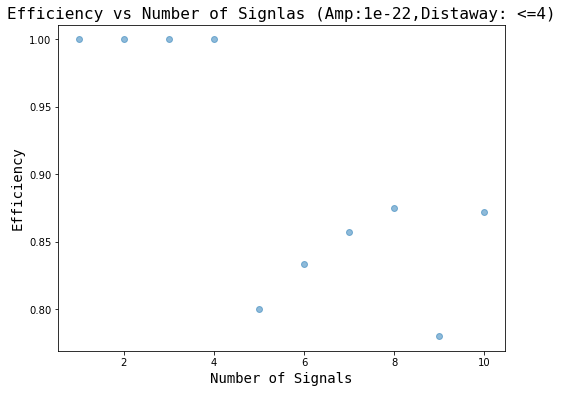

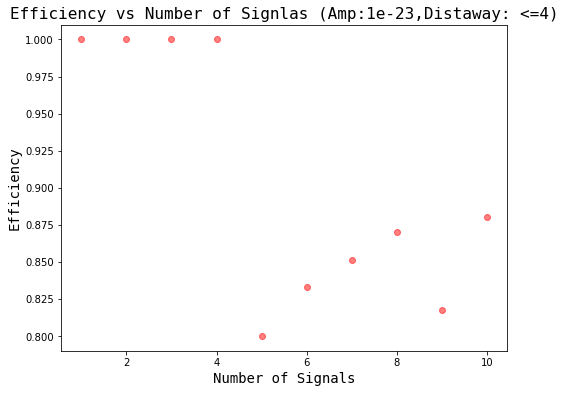

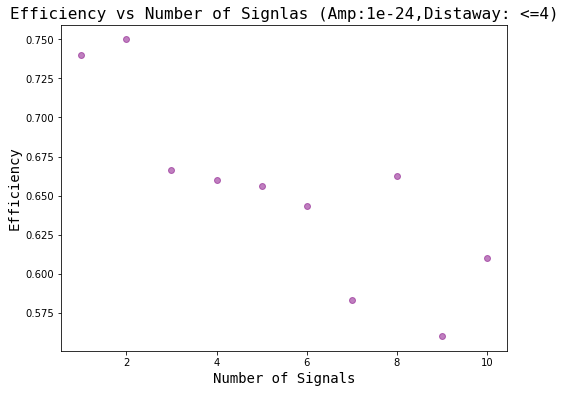

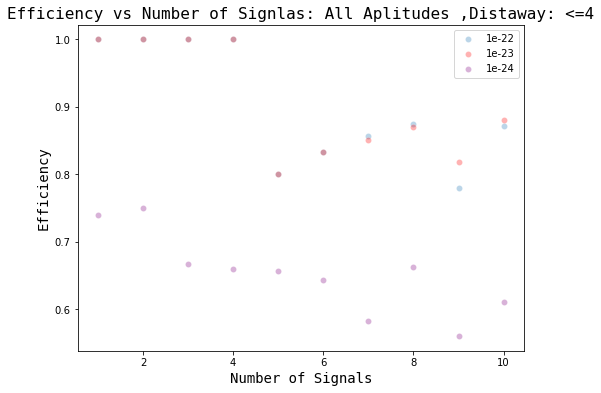

In [45]:
N=np.arange(1,11)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E1,alpha=.5)
plt.title('Efficiency vs Number of Signlas (Amp:1e-22,Distaway: <=4)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="r")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23,Distaway: <=4)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="purple")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24,Distaway: <=4)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.3,label='1e-22')
sns.scatterplot(N,E2,alpha=.3,color="r",label='1e-23')
sns.scatterplot(N,E3,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes ,Distaway: <=4',font='monospace',fontsize=16)

plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend()

In [46]:
DF=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
E1=[]
E2=[]
E3=[]
for i in DF:
    e1,e2,e3=Efficiency_Multi_Dist(i,5)
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


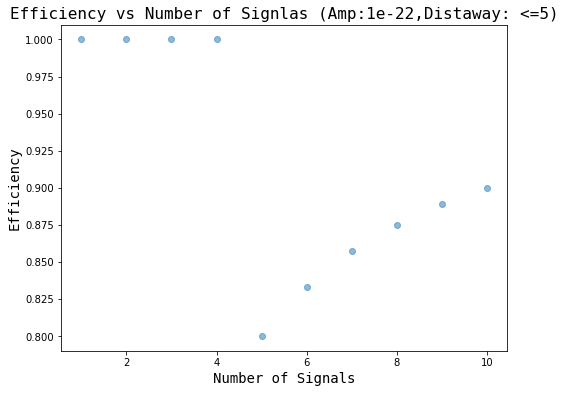

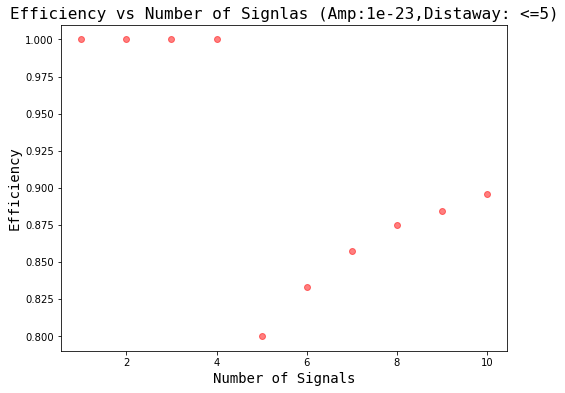

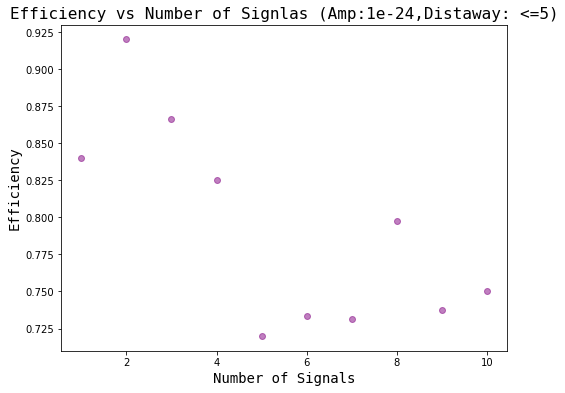

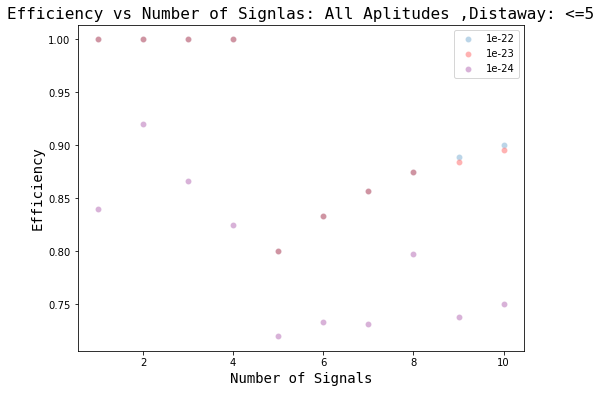

In [47]:
N=np.arange(1,11)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E1,alpha=.5)
plt.title('Efficiency vs Number of Signlas (Amp:1e-22,Distaway: <=5)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="r")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23,Distaway: <=5)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="purple")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24,Distaway: <=5)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.3,label='1e-22')
sns.scatterplot(N,E2,alpha=.3,color="r",label='1e-23')
sns.scatterplot(N,E3,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes ,Distaway: <=5',font='monospace',fontsize=16)

plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend()

In [48]:
DF=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
E1=[]
E2=[]
E3=[]
for i in DF:
    e1,e2,e3=Efficiency_Multi_Dist(i,6)
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


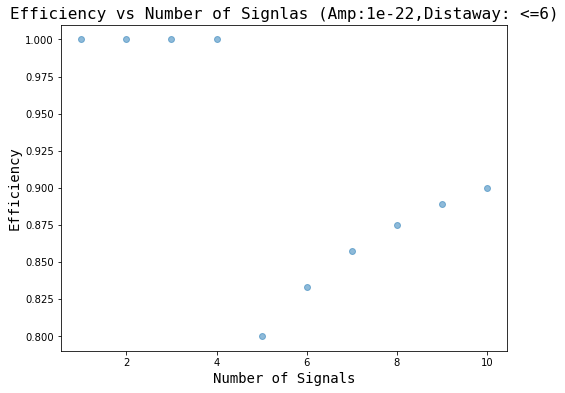

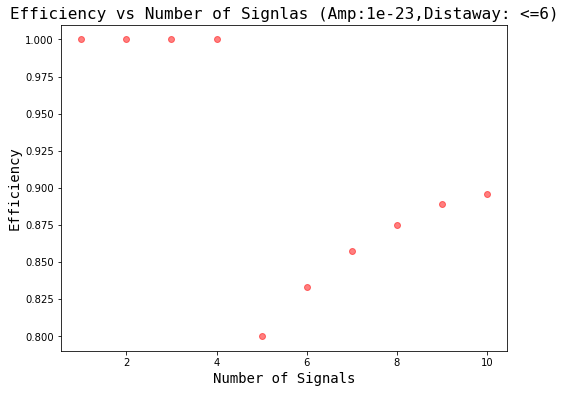

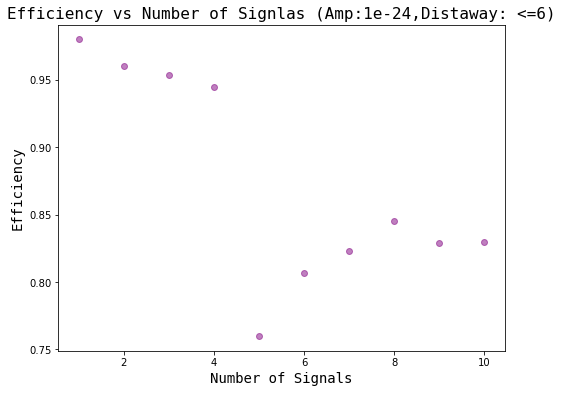

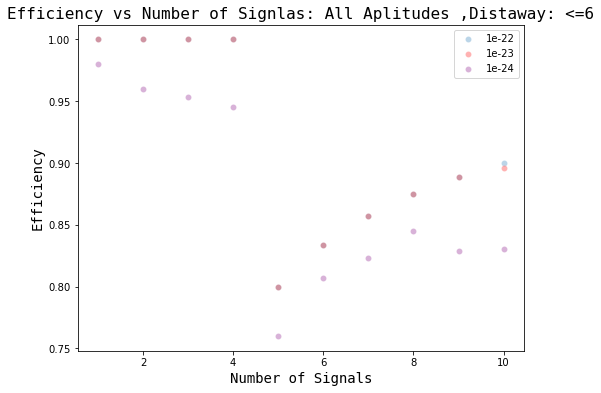

In [49]:
N=np.arange(1,11)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E1,alpha=.5)
plt.title('Efficiency vs Number of Signlas (Amp:1e-22,Distaway: <=6)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="r")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23,Distaway: <=6)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="purple")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24,Distaway: <=6)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.3,label='1e-22')
sns.scatterplot(N,E2,alpha=.3,color="r",label='1e-23')
sns.scatterplot(N,E3,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes ,Distaway: <=6',font='monospace',fontsize=16)

plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend()

In [50]:
#its hard to see how much of a change the distaicne had on the effieincent 
#so lets graph them togehter

In [51]:
DF=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
E1=[]
E2=[]
E3=[]
A1=[]
A2=[]
A3=[]
B1=[]
B2=[]
B3=[]

for i in DF:
    e1,e2,e3=Efficiency_Multi_Dist(i,6)
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)

for i in DF:
    e1,e2,e3=Efficiency_Multi_Dist(i,5)
    A1.append(e1)
    A2.append(e2)
    A3.append(e3)

for i in DF:
    e1,e2,e3=Efficiency_Multi_Dist(i,4)
    B1.append(e1)
    B2.append(e2)
    B3.append(e3)

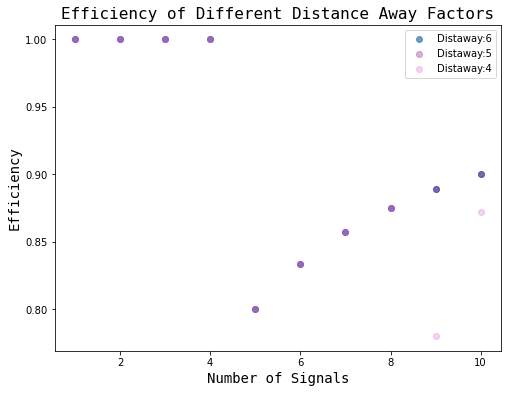

In [52]:
plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E1,alpha=.8,label='Distaway:6',color='steelblue')
plt.scatter(N,A1,alpha=.3,label='Distaway:5',color='purple')
plt.scatter(N,B1,alpha=.3,label='Distaway:4',color='orchid')
plt.title('Efficiency of Different Distance Away Factors',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
df5['h0']

0     1.000000e-24
1     1.000000e-24
2     1.000000e-24
3     1.000000e-24
4     1.000000e-24
          ...     
45    1.000000e-23
46    1.000000e-23
47    1.000000e-23
48    1.000000e-23
49    1.000000e-23
Name: h0, Length: 150, dtype: float64

In [206]:
df5[df5['h0']>9.000000e-24  df5['h0']<1.1e-23]

SyntaxError: invalid syntax (1819594099.py, line 1)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

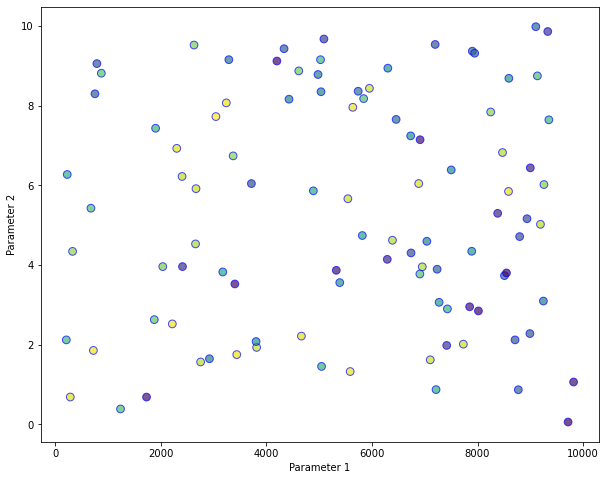

In [46]:
x=np.random.rand(100)*10000
y=np.random.rand(100)*10
z=np.random.rand(100)
fig = plt.figure(figsize=(10,8),facecolor='w')#scale of graph

ax = fig.add_subplot()#makes the graph 3d
ax.scatter(x, y,#Adds axis to plot points
           linewidths=1, alpha=.7,
           edgecolor='blue',#changes the color of borders of points
           s = 60,#changes size of points
           c=z,cmap="viridis")

plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.colorbar(,cmap="viridis")
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

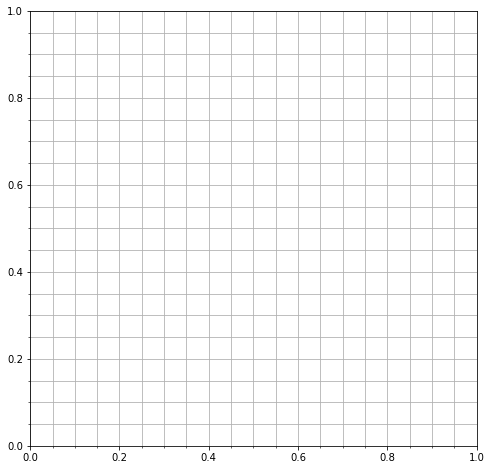

In [50]:
fig = plt.figure(figsize=(8,8),facecolor='w')
ax = fig.add_subplot()
ax.grid(which = "both")
ax.minorticks_on()
ax.pcolormesh(x, y, z)
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.xlim(0,10000)
plt.ylim(0,10)

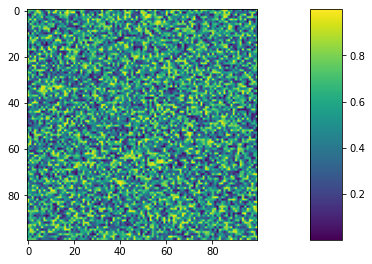

In [49]:
np.random.seed(19680801)

plt.subplot()
plt.imshow(np.random.random((100, 100)))

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

plt.show()